<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/data/Tensor_Management.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Kata: Tensor Management

## Instructions

This is a self-correcting exercise generated by [nbgrader](https://github.com/jupyter/nbgrader). 

Complete the cells beginning with `# YOUR CODE HERE` and run the subsequent cells to check your code.

## Part 1: Tensor Basics

In [239]:
# Import NumPy
import numpy as np
import sklearn
import keras

### Question

Create a 2D tensor (a matrix) with dimensions (3,4) containing integer values of your choice. Store this tensor in a variable named `x`.

In [240]:
x = np.matrix([[1,2,3,4],[8,5,6,7],[1,7,8,9]], np.int32)
x

matrix([[1, 2, 3, 4],
        [8, 5, 6, 7],
        [1, 7, 8, 9]])

In [241]:
print(x)
# Assert dimensions
assert x.ndim == 2
assert x.shape == (3, 4)
# Assert data type 
assert issubclass(x.dtype.type, np.integer)

[[1 2 3 4]
 [8 5 6 7]
 [1 7 8 9]]


### Question

Update the shape of the previous tensor so that it has dimensions (6,2).

In [242]:
x = x.reshape(6,2)

In [243]:
print(x)
# Assert tensor dimensions
assert x.ndim == 2
assert x.shape == (6, 2)

[[1 2]
 [3 4]
 [8 5]
 [6 7]
 [1 7]
 [8 9]]


### Question

Change the type of the previous tensor values to `float32`.

In [244]:
x = x.astype(np.float32)

In [245]:
print(x)
# Assert data type
assert issubclass(x.dtype.type, np.floating)

[[1. 2.]
 [3. 4.]
 [8. 5.]
 [6. 7.]
 [1. 7.]
 [8. 9.]]


### Question

Normalize the previous tensor so that it has a mean of 0 and a standard deviation of 1 on its first axis.

In [246]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x

array([[-1.1721057 , -1.604515  ],
       [-0.502331  , -0.72932494],
       [ 1.1721057 , -0.29173   ],
       [ 0.502331  ,  0.58346   ],
       [-1.1721057 ,  0.58346   ],
       [ 1.1721057 ,  1.4586499 ]], dtype=float32)

In [247]:

x_mean = x.mean(axis=0)
print(x_mean)
x_std = x.std(axis=0)
print(x_std)
# Assert mean
assert np.abs(np.max(x_mean)) < 10**-6
# Assert standard deviation
assert np.abs(np.max(x_std-1)) < 10**-6

[ 0.0000000e+00 -1.9868216e-08]
[1. 1.]


## Part 2: One-hot Encoding

In [248]:
import keras
from keras.utils import to_categorical

# Definition of a 1D tensor (vector)
tensor = np.array([3, 1, 0, 2, 1])

### Question

Encode the previous tensor into the `x` variable, following a binary representation (`one-hot encoding`).

In [249]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
x = tensor.reshape(-1,1)
x = OneHotEncoder(sparse=False).fit_transform(x)
x


array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [250]:
print(x)
# Assert one-hot encoding
assert x.shape == (5, 4)
assert np.array_equal([0,0,0,1], x[0])
assert np.array_equal([0,1,0,0], x[1])
assert np.array_equal([1,0,0,0], x[2])
assert np.array_equal([0,0,1,0], x[3])
assert np.array_equal([0,1,0,0], x[4])

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


## Part 3: Image Management

In [251]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images
# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Number of images: 2. Images tensor: (2, 427, 640, 3)
First image: (427, 640, 3)


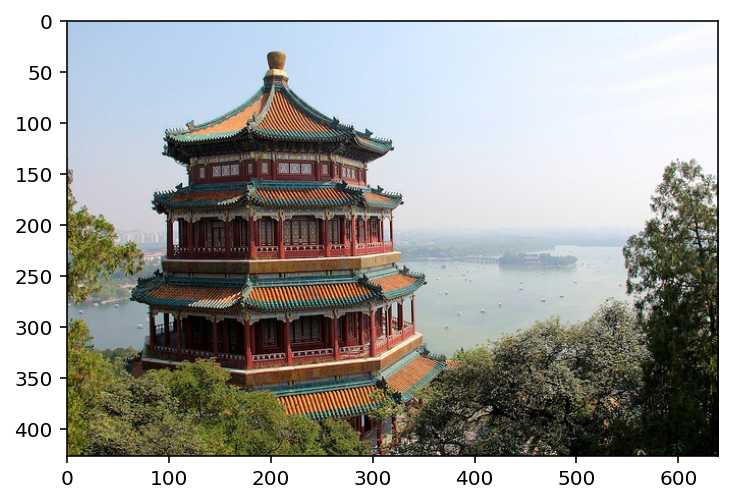

In [252]:
# Load samples images
images = np.asarray(load_sample_images().images)
print(f'Number of images: {len(images)}. Images tensor: {images.shape}')

first_image = images[0]
# Display first image
plt.imshow(first_image)

# Print details about first image
print(f'First image: {first_image.shape}')

### Question

Store in variables respectively named `rgb_values_topleft` and `rgb_values_bottomright` the RGB values of the top-left and bottom-right pixels of the first image.

In [253]:
rgb_values_topleft = images[0][0][0]
rgb_values_bottomright = images[0][-1][-1]
print(rgb_values_topleft, rgb_values_bottomright)
print((images.shape))

[174 201 231] [15 24  7]
(2, 427, 640, 3)


In [254]:
print(f'Top-left pixel: {rgb_values_topleft}')
assert rgb_values_topleft.shape == (3,)
print(f'Bottom-right pixel: {rgb_values_bottomright}')
assert rgb_values_bottomright.shape == (3,)

Top-left pixel: [174 201 231]
Bottom-right pixel: [15 24  7]


### Question

Reshape the previous `images` tensor into a 2D tensor.

In [255]:
j = 1
for i in range(1,len(images.shape)): j *= images.shape[i]
images = images.reshape(2,j)
images.shape

(2, 819840)

In [256]:
# Assert new tensor dimensions
assert images.shape == (2, 819840)
# Assert RGB values of top-left in first image
assert np.array_equal(rgb_values_topleft, images[0,:3])
# Assert RGB values of bottom-right pixel in first image
assert np.array_equal(rgb_values_bottomright, images[0,819837:])